# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# C:\Netology\HW_task\FEML\300421_Алгоритмы_кластеризации\Homework
    
data = pd.read_excel('geo.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [6]:
data.tail()

,Unnamed: 0,x,y,comment_class
108801,108801,37.454528,55.792331,-1
108802,108802,37.384325,55.899068,-1
108803,108803,37.421066,55.848756,1
108804,108804,37.448509,55.793065,-1
108805,108805,37.451249,55.836620,-1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     108806 non-null  int64  
 1   x              108806 non-null  float64
 2   y              108806 non-null  float64
 3   comment_class  108806 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 MB


In [9]:
data.drop('Unnamed: 0', axis = 1, inplace=True)

In [14]:
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [16]:
data_positive = data[data.comment_class == 1]
data_negative = data[data.comment_class == -1]

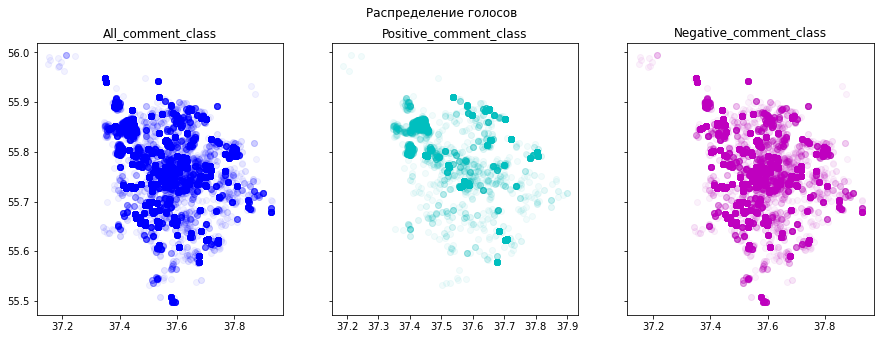

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharey = True);
ax1.scatter(x = data.x, y = data.y, alpha = 0.05,  color='b')
ax2.scatter(x = data_positive.x, y = data_positive.y, alpha = 0.05, color='c')
ax3.scatter(x = data_negative.x, y = data_negative.y, alpha = 0.05, color='m')
fig.suptitle('Распределение голосов')
titles = ["All_comment_class", "Positive_comment_class", "Negative_comment_class"]
colors = ["b", "c", "m"]
all_data = [data, data_positive, data_negative]
for number, title in zip (fig.axes, titles):
    number.set_title(title, fontsize = 12)

##### Кластеризация  KMeans

In [35]:
from sklearn.cluster import KMeans

In [36]:
data_clust = data.drop('comment_class', axis = 1)
km = KMeans(n_clusters = 10)
km.fit(data_clust)
clusters = km.predict(data_clust)

In [37]:
for i in range(10):
    print (i,'cluster =',len(data_clust[clusters == i]))

0 cluster = 10391
1 cluster = 10023
2 cluster = 16376
3 cluster = 17050
4 cluster = 13673
5 cluster = 17944
6 cluster = 3698
7 cluster = 11799
8 cluster = 2236
9 cluster = 5616


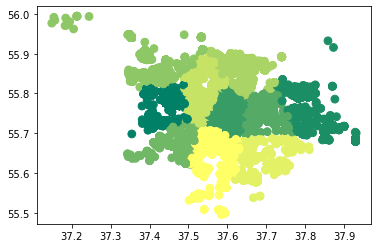

In [39]:
plt.scatter(data_clust.x, data_clust.y, c = clusters, cmap = 'summer', s = 60)

In [40]:
# определяю число кластеров

k_inertia = []
ks = range(1,15)

for k in ks:
    clf_km = KMeans(n_clusters = k)
    clusters_km = clf_km.fit_predict(data_clust)
    k_inertia.append(clf_km.inertia_ / 100)

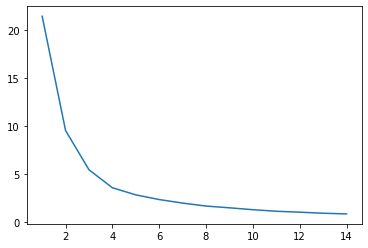

In [43]:
plt.plot(ks, k_inertia)

In [44]:
# исходя из графика можно определить четыре кластера
data_clust = data.drop('comment_class', axis = 1)
km = KMeans(n_clusters = 4)
km.fit(data_clust)
clusters = km.predict(data_clust)

In [45]:
# получилось более менее нормальное распределение

for i in range(4):
    print (i,'cluster =',len(data_clust[clusters == i]))

0 cluster = 26319
1 cluster = 31177
2 cluster = 28853
3 cluster = 22457


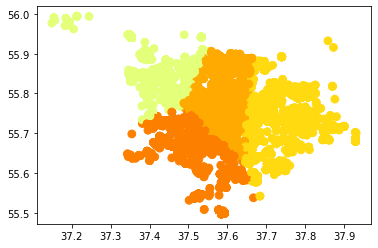

In [46]:
plt.scatter(data_clust.x, data_clust.y, c = clusters, cmap = 'Wistia', s = 60)

##### DBSCAN дополнительное задание
* наиболее плотные районы голосования

In [47]:
from sklearn.cluster import DBSCAN

In [48]:
choice = np.random.choice(data_clust.index, size = 50000, replace = False).tolist()
data_DBSCAN = data_clust[data_clust.index.isin(choice)]

In [49]:
db_classic = DBSCAN(eps = 0.02, min_samples = 1000, n_jobs =- 1 )

In [50]:
db_clusters = db_classic.fit_predict(data_DBSCAN)

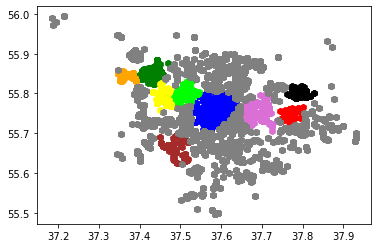

In [61]:
for i,color in zip(range(10),{'blue','red','green','black','orange','yellow','brown','orchid','lime'}):
    x_i = data_DBSCAN.x[db_clusters == i]
    y_i = data_DBSCAN.y[db_clusters == i]
    plt.plot(x_i, y_i, 'h', c = color)
    plt.plot(x_i, y_i, 'h', c = color)
    
    x_0 = data_DBSCAN.x[db_clusters == -1]
    y_0 = data_DBSCAN.y[db_clusters == -1]
    plt.plot(x_0, y_0, 'h', c ='grey')